# Data Analysis Project - Investigating Fandango Movie Ratings

<div class="alert alert-block alert-warning">
<b>Context: </b> the purpose of this project is to wrap up of concepts about statistics fundamentals for Data Analysis.
</div>

**[Click me](https://trello.com/b/TVDmsO7i/my-self-created-data-analytics-master-degree)** to check out my ongoing projects

<div class="alert alert-block alert-success">
<b>Concepts tackled:</b>
</div>

- [x] Sampling
- [x] Variables in statistics
- [x] Frequency distributions
- [x] Visualizing Frequency Distributions
- [x] Comparing Frequency Distributions

<div class="alert alert-block alert-danger">
<b>Discover more :</b>
</div>

<nav>
<a href=https://www.linkedin.com/in/tangi-gouez/ >LinkedIn</a> |
<a href=https://github.com/tangigouez/ >Github</a> |
<a href=https://tangigouezanalytics.hashnode.dev/ >My Blog</a> |
</nav>

## **Introduction**

In October 2015, Walt Hickey released  an [article](https://fivethirtyeight.com/features/fandango-movies-ratings) on Five Thirty Eight, to show evidence that Fandango's movie rating system was **biased and dishonest**. Indeed, after doing some research, he found that there was a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He observed that the actual movie rating was almost always **rounded up to the nearest half-star**. 

Below is a **visual summary** of the patterns he observed.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible.

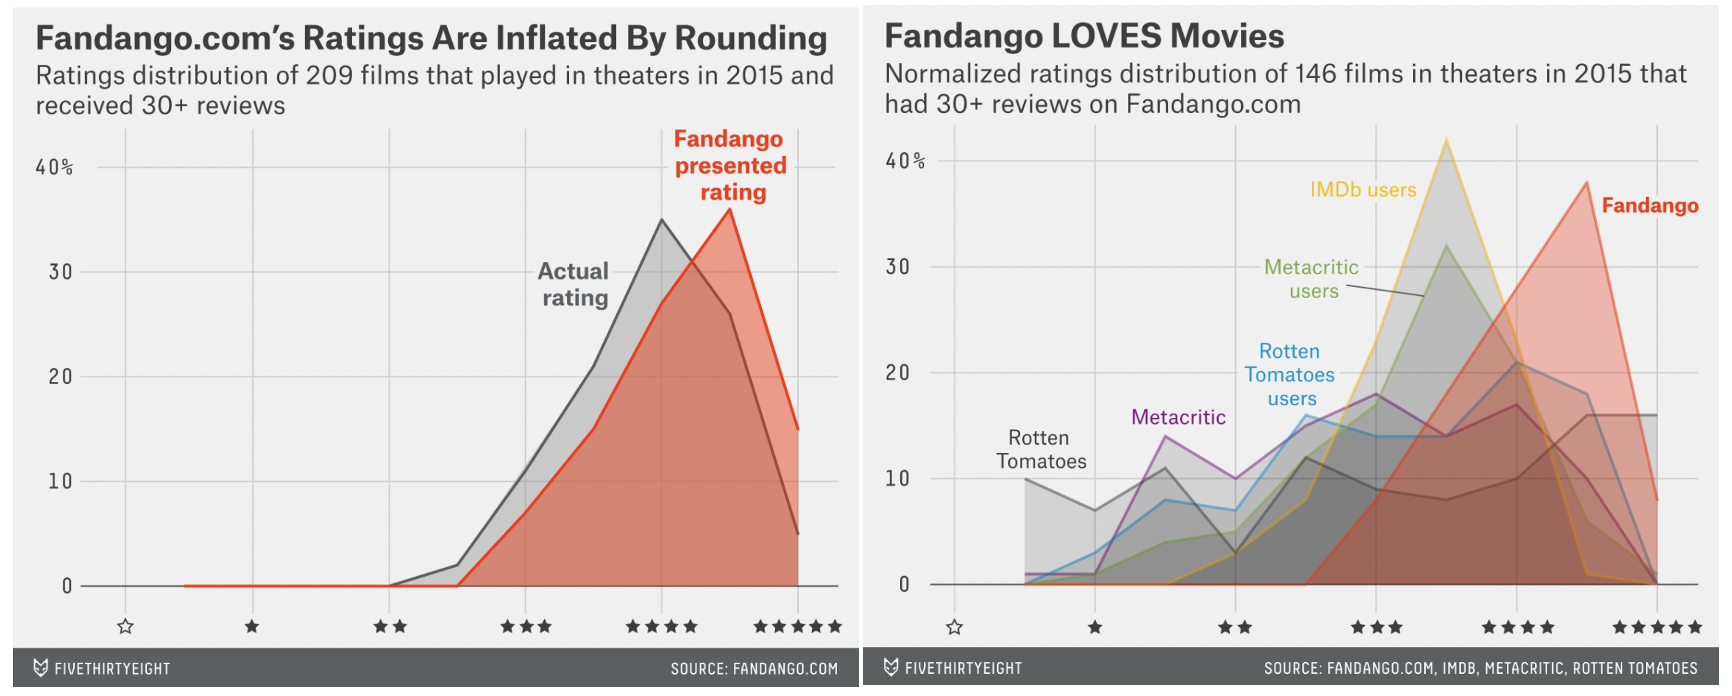

In [3]:
from IPython.display import Image
Image(filename='/Users/tangigouez/Documents/Investigating Fandango Movie Ratings Datasets/538_Fandango.png', width = 1000)

In this project, I will analyze more recent movie ratings data **to determine whether there has been any change in Fandango's rating system** after Hickey's analysis. 

To do so, we will use the following datasets : 

- **[Dataset #1](https://github.com/fivethirtyeight/data/tree/master/fandango):** 
    - Walt Hickey made the data he analyzed publicly available on GitHub. 
    - It contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. 
    - The data from Fandango was pulled on Aug. 24, 2015. .
- **[Dataset #2](https://github.com/mircealex/Movie_ratings_2016_17):** 
    - There is a movie ratings public dataset on Github for movies released in 2016 and 2017. 
    - The dataset contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. 
    - As of March 22, 2017, the ratings were up to date. 

I will use the first dataset to study the characteristics of Fandango's rating system **previous to Hickey's analysis** and the second one to compare the rating system's characteristics **after his analysis**.

## **1. Getting good Data**

### 1.1. Import Data

In [2]:
import pandas as pd

data_movie_15 = pd.read_csv('/Users/tangigouez/Documents/Investigating Fandango Movie Ratings Datasets/fandango_score_comparison.csv')
data_movie_16_17 = pd.read_csv('/Users/tangigouez/Documents/Investigating Fandango Movie Ratings Datasets/movie_ratings_16_17.csv')

### 1.2. Work with Samples

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to **compare the system's characteristics previous and after the analysis**.

Because both datasets don't contain all the movies which have ever been rated on Fandango (only 2015 and 2016) and that they concern specific types of movies (popular ones), they are **samples of our population of interest** in the context of our analysis.

To start with, let's explore datasets to understand their structure and select the relevant columns for our project. 

In [3]:
fandango_ratings_previous = data_movie_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_ratings_after = data_movie_16_17[['movie', 'year', 'fandango']]

In [4]:
fandango_ratings_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [5]:
fandango_ratings_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
fandango_ratings_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [7]:
fandango_ratings_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


### 1.3. Are the 2 samples representative of the population we are trying to describe ?

The **population of interest for our analysis** is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

As we are interested in the change of the parameters of this population following Hickey's analysis, we need to sample the population at two different periods in time (previous and after Hickey's analysis) so we can compare the two states. We have to make sure that the samples we are working with are **representative**, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

The [first dataset](https://github.com/fivethirtyeight/data/tree/master/fandango) used by Hickey's contains Fandango movie ratings which respect the following criterias : 
- It needs to have a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score
- And at least 30 fan reviews on Fandango

Here, we can observe the **the sampling was clearly not random** as not every movie had the same chance to be included in the sample. The ones without tickets on sale on 2015 and less than 30 fan reviews are not even eligible. We know that the **quality/popularity of movies can change over years** so we can question if this sample is representative of the population we are trying to describe. It looks like it is not.

Regarding the [second dataset](https://github.com/mircealex/Movie_ratings_2016_17), sampling conditions were the following : 
- The movie must have been released after 2016
- It must have a significant number of votes (it is not clear precisely what is the definition of "significant" in the READ.me file)

Considering the **lack of precision in the description of the dataset and the fact that movies are subject to temporal trends**, we can conclude that this sample is unlikely to be representative of our population of interest.

Both of the authors of the datasets had a precise goal in mind when they sampled the data, while it was useful for them, we can't use them as they are for our research because **they are unlikely to be representative of the population we're interested in describing**.

## **2. Adjusting the population of interest of our analysis**

Considering the samples we have at our disposal, we should **change the goal of our analysis**. 

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to **determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016**. Considering data sources we have at our disposal, setting this new goal is the best proxy for our initial goal.

### **2.1. Isolating the samples we need**

Now that we decided to change our research goal, we can define our new population of interest :
- All Fandango's ratings for **popular movies released in 2015**.
- All Fandango's ratings for **popular movies released in 2016**.

Based on Hickey's benchmark, a movie is considered as popular only if it has 30 fan ratings or more on Fandango's website.

However, we don't have any column in one of our dataset that provides information about movie popularity.

One quick way to **check the representativity of this sample** is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 80% have 30 fan ratings or more.

### 2.2. Popularity ranking of the movies in the samples

In [13]:
fandango_ratings_after_sample = fandango_ratings_after.sample(10, random_state = 1)
num_ratings = [2247, 7271, 493, 5263, 13400, 17, 127, 11877, 500, 35057]
fandango_ratings_after_sample['votes'] = num_ratings

In [14]:
fandango_ratings_after_sample

,movie,year,fandango,votes
108,Mechanic: Resurrection,2016,4.0,2247
206,Warcraft,2016,4.0,7271
106,Max Steel,2016,3.5,493
107,Me Before You,2016,4.5,5263
51,Fantastic Beasts and Where to Find Them,2016,4.5,13400
33,Cell,2016,3.0,17
59,Genius,2016,3.5,127
152,Sully,2016,4.5,11877
4,A Hologram for the King,2016,3.0,500
31,Captain America: Civil War,2016,4.5,35057


In [31]:
"{:.2%}".format(sum(fandango_ratings_after_sample['votes'] < 30)/len(fandango_ratings_after_sample['votes'])) + ' of movies in the sample have less than 30 votes'

'10.00% of movies in the sample have less than 30 votes'

**90% of movies that have been randomly selected are popular**. Thus, we can move forward with more confidence about the sample representativity.

Although the documentation of the **other sample** clearly states that they are only movies with at least 30 ratings, let's **double check** if it is the case.

In [21]:
sum(fandango_ratings_previous['Fandango_votes'] < 30)

0

### 2.3. Release year of the movies in the samples

In [32]:
import warnings
warnings.filterwarnings("ignore")

When exploring both datasets, you can notice that there are movies which have been released in a year different than 2015 or 2016. Let's isolate only the movies which respect our initial sampling criteria.

In [35]:
fandango_ratings_previous['Year'] = fandango_ratings_previous['FILM'].str[-5:-1]
fandango_ratings_previous['Year'].value_counts(normalize = True)*100

2015    88.356164
2014    11.643836
Name: Year, dtype: float64

In [36]:
fandango_2015 = fandango_ratings_previous[fandango_ratings_previous['Year'] == '2015']
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [37]:
fandango_ratings_after['year'].value_counts(normalize = True)*100

2016    89.252336
2017    10.747664
Name: year, dtype: float64

In [38]:
fandango_2016 = fandango_ratings_after[fandango_ratings_after['year']==2016]
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## **3. Is there a difference in the distribution shapes for popular movies rated in 2015 and 2016 ?**

After all these preliminary steps, we can now **start analyzing the two samples we isolated before**. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

We'll start with comparing the shape of the two distributions using kernel density plots. 

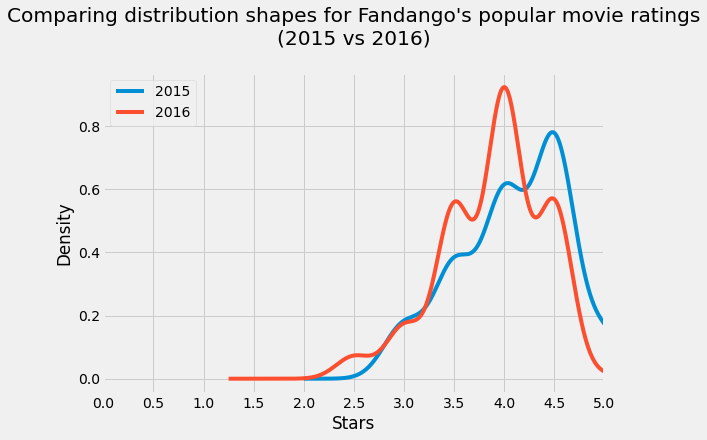

In [39]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's popular movie ratings\n(2015 vs 2016)",
          y = 1.07) 
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))
plt.show()

We can observe that both distributions are **negatively skewed**. The 2016 distribution is slightly shifted to the left compared to 2015 one.

The fact that distributions are left skewed suggest that **popular movies rated on Fandango are given mostly high and very high fan ratings**. As selling tickets online is part of Fandango business model, it is not quite surprising to see such a shape of distribution as they have a clear financial incentive to inflate the ratings.

In the scope of our analysis, the difference in the shape of the 2 distributions is interesting. Indeed, the direction of the difference shows that **ratings for popular movies were slightly lower in 2016 compared to 2015**.

## **4. Confirm the pattern identified in the difference between ditribution shapes**

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more **granular information**.

### 4.1. Frequency distributions

In [16]:
print('2015' + '\n' + '-' * 16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100 

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index()*100 

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at frequency distribution tables, we can observe that the share of Fandango popular movie ratings above or equal 4.5 nearly **decreased by 20% in 2016 compared to 2015**. 

The **minimum rating is lower in 2016 as well**. Indeed, there was not a single popular movie that was rated below 3.0 in 2016, whereas in 2016 there was 3% of the movies in the sample rated 2.5. 

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and **this challenges the direction of the change we saw on the kernel density plots**.

### 4.2. Determining the direction of change with summary statistics

We confirmed with the two tables before that there is indeed a difference between the two distributions. However, the direction of the difference is not as visible as it was on the kernel density plots. 
To get a more granular idea of the direction of change, let's compare the summary statistics of both groups.

In [29]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


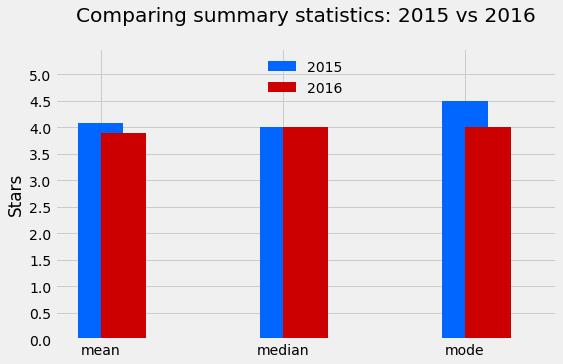

In [31]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [43]:
mean_difference = (mean_2016 - mean_2015) / mean_2015 * 100
print('Mean difference = ' + str(round(mean_difference,2)) + '%')

Mean difference = -4.84%


The mean rating was lower in 2016 with approximately 0.2 stars. This is a **drop of almost 5% relative to the mean rating in 2015**.

While the median is the same for both distributions, the **mode is lower in 2016 by 0.5 stars**. 

Thus, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated **slightly lower than popular movies released in 2015**.

## **Conclusion**

Overall, there are evidences showing a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

Although, we are not sure of the reason this decrease happened,chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.